# Pandas III: Data Wrangling
Agenda today:
- Reshaping and Structuring Data
    - __set_index()__
    - __unstack()__
    - __stack()__
    - __pivot()__/__pivot_table__
- Case study and exercises
*some image credit to [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)*

____


## 1. Reshaping DataFrames

### 1.1 Advanced Indexing
- __set_index()__: <br>
Set the index of a dataframes
- __reset_index()__ : <br>
reset_index method will transform our Series into a DataFrame and move the indices into their own column. Generally, you'll always see a groupby statement followed by reset_index

In [1]:
import numpy as np
import pandas as pd

In [2]:
# create some data 
grades_dict = {"student_names":['Gordon','Chris','Max','Gordon','Mike','Chris','MaryJo','Gordon','Chris','MaryJo'],
         "project":["proj_1","proj_1","proj_1","proj_2","proj_1","proj_2","proj_1","proj_3","proj_3","proj_3"],
         "grades":np.random.randint(80,100,10)}



In [3]:
grades_dict

{'student_names': ['Gordon',
  'Chris',
  'Max',
  'Gordon',
  'Mike',
  'Chris',
  'MaryJo',
  'Gordon',
  'Chris',
  'MaryJo'],
 'project': ['proj_1',
  'proj_1',
  'proj_1',
  'proj_2',
  'proj_1',
  'proj_2',
  'proj_1',
  'proj_3',
  'proj_3',
  'proj_3'],
 'grades': array([87, 97, 94, 94, 96, 84, 98, 84, 91, 97])}

In [4]:
grades = pd.DataFrame(grades_dict)
grades

,student_names,project,grades
0,Gordon,proj_1,87
1,Chris,proj_1,97
2,Max,proj_1,94
3,Gordon,proj_2,94
4,Mike,proj_1,96
5,Chris,proj_2,84
6,MaryJo,proj_1,98
7,Gordon,proj_3,84
8,Chris,proj_3,91
9,MaryJo,proj_3,97


In [5]:
grades.index

RangeIndex(start=0, stop=10, step=1)

In [6]:
grades.columns

Index(['student_names', 'project', 'grades'], dtype='object')

In [7]:
grades.sort_values(by = 'student_names', inplace = True)
grades

,student_names,project,grades
1,Chris,proj_1,97
5,Chris,proj_2,84
8,Chris,proj_3,91
0,Gordon,proj_1,87
3,Gordon,proj_2,94
7,Gordon,proj_3,84
6,MaryJo,proj_1,98
9,MaryJo,proj_3,97
2,Max,proj_1,94
4,Mike,proj_1,96


In [ ]:
# you can see that even though the student names are sorted, the index are not in order
# use a method that will put the index in order


In [8]:
# transform the original grades df into a multilevel indexed dataframe
grades_multi = grades.set_index(['student_names','project'])
grades_multi

grades
student_names project        
Chris         proj_1       97
              proj_2       84
              proj_3       91
Gordon        proj_1       87
              proj_2       94
              proj_3       84
MaryJo        proj_1       98
              proj_3       97
Max           proj_1       94
Mike          proj_1       96

#### Working with multilevel indexed dataframe

In [9]:
# examine the row index and columns of this new df
grades_multi.index

MultiIndex(levels=[['Chris', 'Gordon', 'MaryJo', 'Max', 'Mike'], ['proj_1', 'proj_2', 'proj_3']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 4], [0, 1, 2, 0, 1, 2, 0, 2, 0, 0]],
           names=['student_names', 'project'])

In [11]:
grades_multi.columns

Index(['grades'], dtype='object')

In [ ]:
# subsetting from this multilevel df 
# I want all of Chris' grades


In [ ]:
# only want Chris's first grade --> passing the row index as a TUPLE


In [ ]:
# want Gordon's first 2 grades 


In [ ]:
# want all of the grades for project 1 for all students


In [22]:
# this is equivalent to grades_multi.loc[('Chris','proj_1'):('MaryJo','proj_1'),:]

### 1.2 Reshaping the dataframe - Pivot, stacking and unstacking 
__pivot_table( )__:<br>
Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.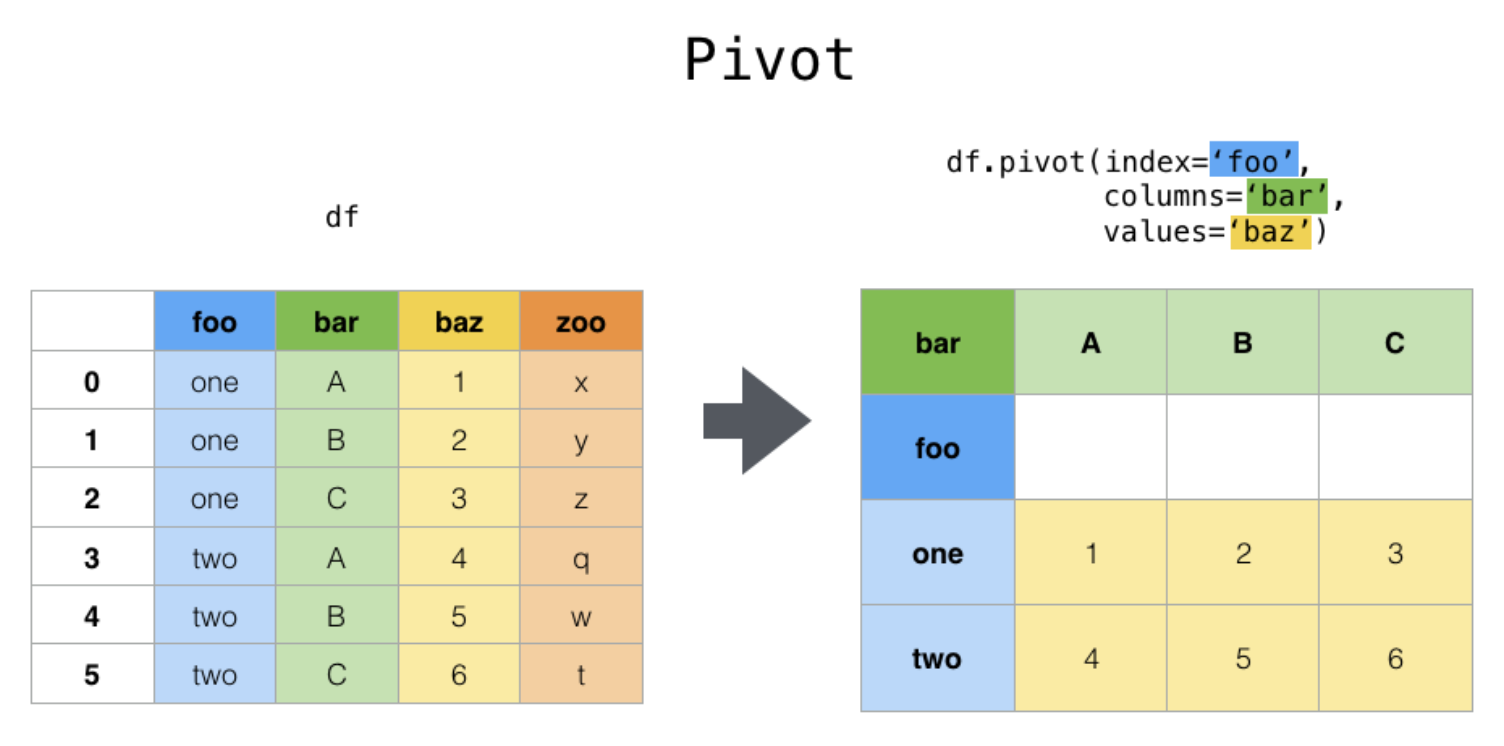

A note on ```pd.pivot()``` and ```pd.pivot_table()```:
- ```pd.pivot``` is able to handle non-numeric data and can't use aggregation
- ```pd.pivot_table``` is able to perform aggregation. A more generalized form of pivot and can handle duplicate entries

In [ ]:
# let's go back to the original grades dataset
grades

In [ ]:
# what if I want to changes the structure of the dataframe?
grades_pivoted = pd.pivot_table(grades, values='grades', index='student_names', columns='project')
grades_pivoted
# why are there some NaN's here?

In [ ]:
grades_pivoted.index

In [ ]:
grades_pivoted.columns

____
__unstack()__:<br>
Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).

The level involved will automatically get sorted.
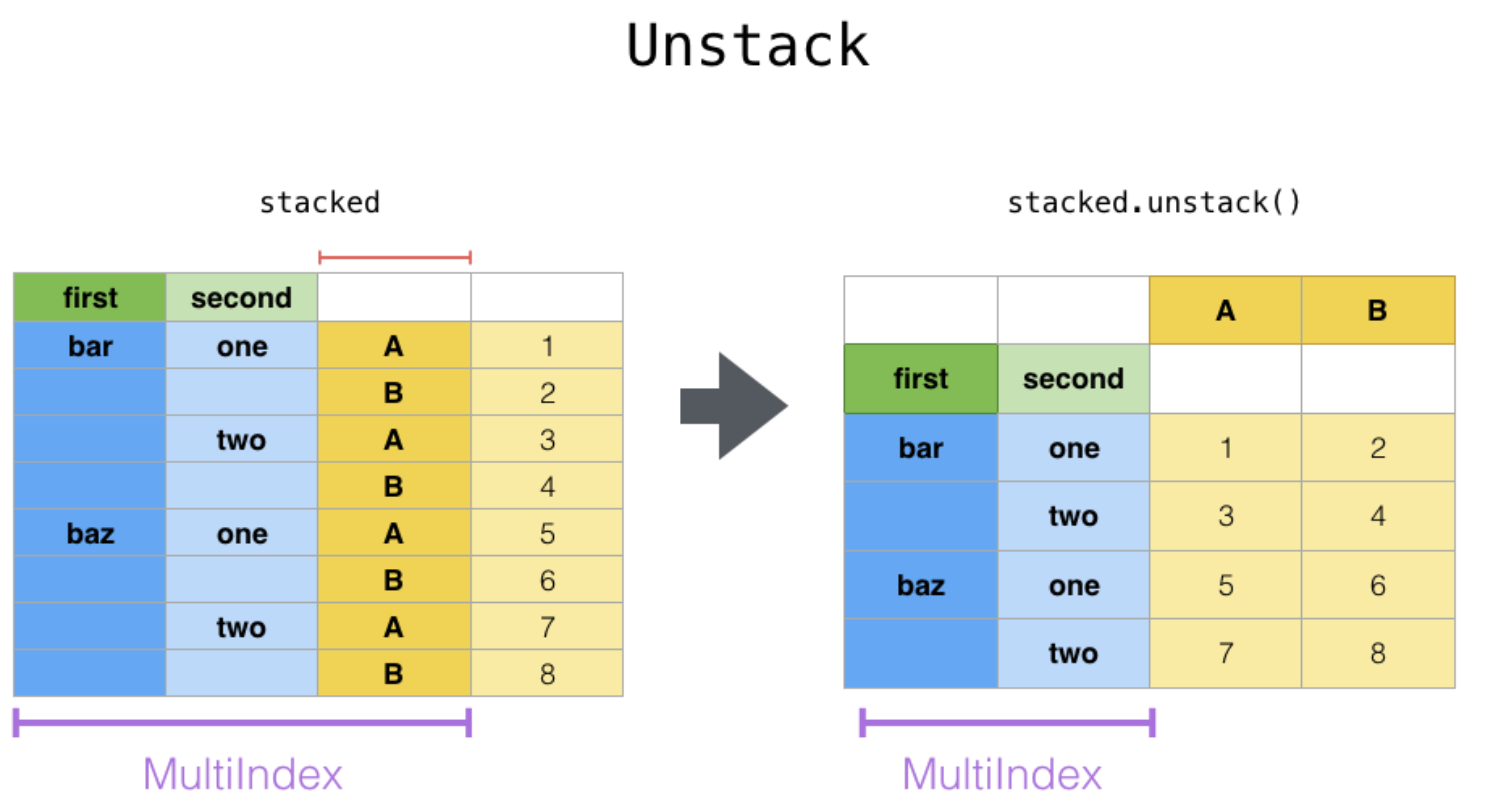

In [23]:
grades

,student_names,project,grades
1,Chris,proj_1,97
5,Chris,proj_2,84
8,Chris,proj_3,91
0,Gordon,proj_1,87
3,Gordon,proj_2,94
7,Gordon,proj_3,84
6,MaryJo,proj_1,98
9,MaryJo,proj_3,97
2,Max,proj_1,94
4,Mike,proj_1,96


In [31]:
grade_ser = grades.groupby(['student_names','project']).grades.mean()
grade_ser

student_names  project
Chris          proj_1     97
               proj_2     84
               proj_3     91
Gordon         proj_1     87
               proj_2     94
               proj_3     84
MaryJo         proj_1     98
               proj_3     97
Max            proj_1     94
Mike           proj_1     96
Name: grades, dtype: int64

In [32]:
pd.DataFrame(grade_ser)

grades
student_names project        
Chris         proj_1       97
              proj_2       84
              proj_3       91
Gordon        proj_1       87
              proj_2       94
              proj_3       84
MaryJo        proj_1       98
              proj_3       97
Max           proj_1       94
Mike          proj_1       96

In [33]:
grade_ser.unstack()
### this is the same as pivoted table above. In fact, unstacking is a special case of pivot table

project,proj_1,proj_2,proj_3
student_names,,,
Chris,97.0,84.0,91.0
Gordon,87.0,94.0,84.0
MaryJo,98.0,NaN,97.0
Max,94.0,NaN,NaN
Mike,96.0,NaN,NaN


____
__stack()__:<br> “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels.
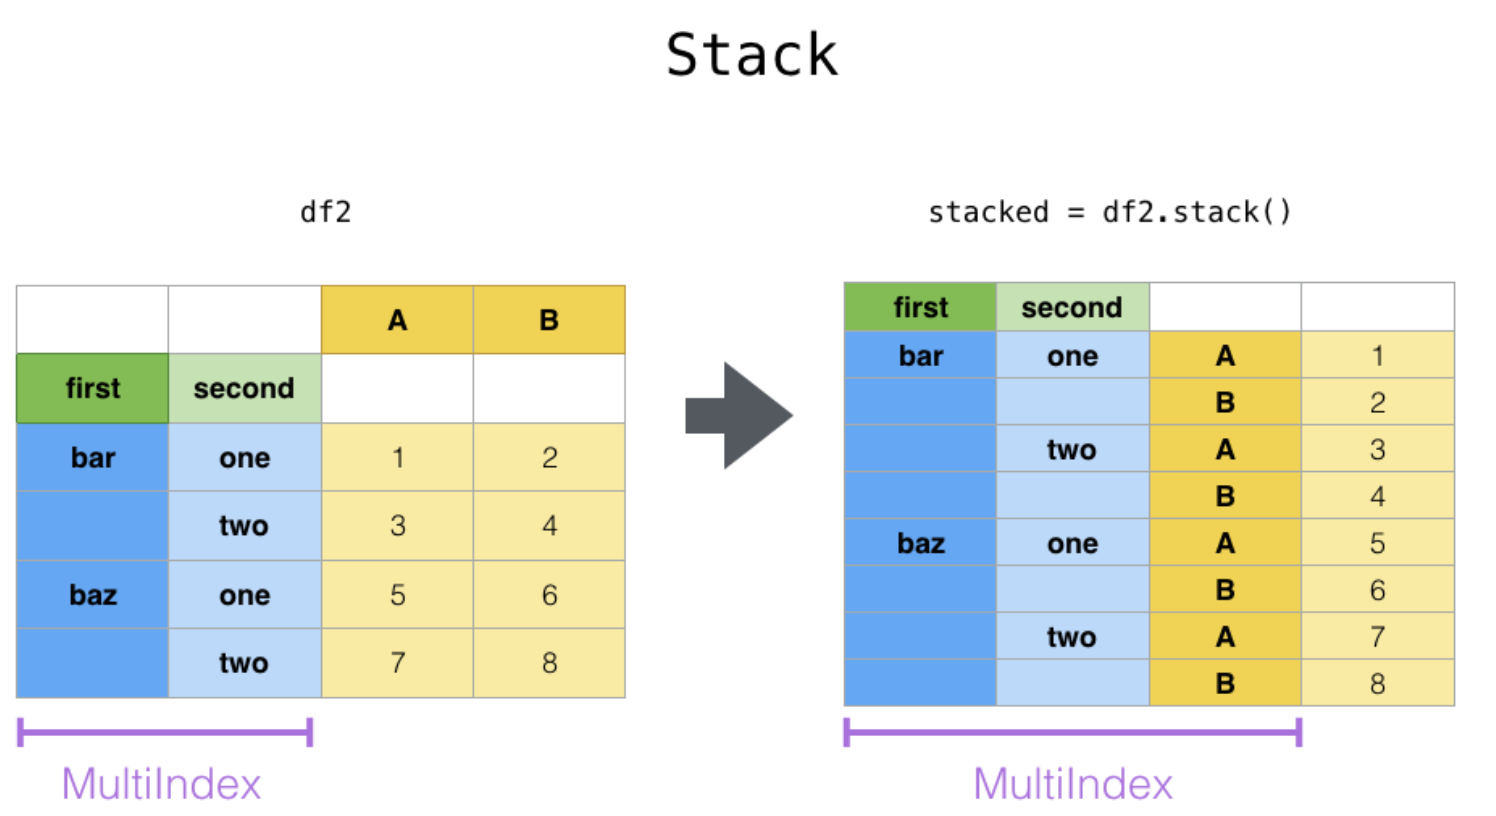

In [ ]:
grades

In [ ]:
grades_pivoted

In [ ]:
# when you stack the dataframe above, you're putting them back in the pd series format they originally were in 
grades_pivoted.stack()

____
## The Adults Dataset

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(url,header=None)
columns = ['age','work_class','fnlwgt','education','education_num','marital_status','occupation','relationship','race'
           ,'sex','capital_gain','capital_loss','hours_per_week','native_country','income']
adults.columns = columns
adults = adults.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
adults['income_binary'] = adults.income.apply(lambda x: 1 if x == '>50K' else 0)

In [ ]:
adults.head(5)

__Reviews!!__

In [ ]:
# review - get a summary statistics of the dataset

In [ ]:
# get the correlation matrix of this dataset

In [ ]:
# get the mean values of hours per week worked organized by occupation


In [ ]:
# get the proportion of adults that make more or less than 50K organized by race


In [ ]:
# what if we want a more legible format - such that the values of adults counts, organized by their race, 
# are in one column if they make more than 50k and in another column otherwise


In [ ]:
# grouping by race 
grouped_by_race = adults.groupby(['race']).income_binary.value_counts().unstack()
grouped_by_race
# allows us to calculate the proportion of people who earned more than 50k by race

In [ ]:
grouped_by_race.plot(kind = 'bar', stacked = True)

In [ ]:
# calculating proportion
grouped_by_race['total'] = adults.groupby(['race']).income_binary.count()
grouped_by_race['percentage'] = grouped_by_race[1]/grouped_by_race.total

In [ ]:
# organize the adults dataset by race and sex
# grouped_by_race_and_sex

In [ ]:
# what would happen if we unstack this?

In [ ]:
# what if I want to unstack sex?